# **Exploratory Data Analysis**:<a class="anchor" id="0"></a>


1. [**Data Import**](#1): Reading in the data

2. [**Initial Data Prep.**](#2): Run some joins and cleanup

3. [**Analysis**](#3): EDA

In [3]:
import numpy as np
import pandas as pd

from _util.custom_plotting import *
from _util.make_confusion_matrix import make_cm
from _util.model_comparisons import *
from _util.custom_mem_opt import custom_mem_opt

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

root = './_data/'

## Data Import<a class=anchor id="1"></a>
[Back to top](#0)

In [5]:
products = pd.read_csv(root + 'products.csv')
print(products.head())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [6]:
aisles = pd.read_csv(root + 'aisles.csv')
print(aisles.head())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
departments = pd.read_csv(root + 'departments.csv')
print(departments.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [8]:
orders = pd.read_csv(root + 'orders.csv')
print(orders.head())

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  


In [9]:
order_products_train = pd.read_csv(root + 'order_products__train.csv')
print(order_products_train.head())

   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1


In [10]:
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
print(order_products_prior.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


## Data preparation<a class=anchor id="2"></a>
[Back to top](#0)

Merge order_products_train and order_products_prior vertically, then remaining dataframes on appropriate key (i.e. order_id, product_id, aisle_id and department_id).

In [11]:
order_products = pd.concat([order_products_prior, order_products_train], ignore_index=True)
print(order_products.shape)

(33819106, 4)


In [12]:
order_products = order_products.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
print(order_products.shape)

(33819106, 15)


In [13]:
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

In [14]:
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   aisle                   object 
 8   department              object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB
None


#### RAM Compression

In [15]:
order_products = custom_mem_opt(order_products)

Memory usage of properties dataframe is : 3870.2896575927734  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1773.8828258514404  MB
This is  45.83333504176927 % of the initial size


#### Clear up additional mem.

In [16]:
del products, orders, order_products_prior, order_products_train, aisles, departments, custom_mem_opt, root

## EDA<a class=anchor id="3"></a>
[Back to top](#0)

In [17]:
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  user_id eval_set  \
0        86             16                eggs  dairy eggs   202279    prior   
1        83              4    fresh vegetables     produce   202279    prior   
2       104             13   spices seasonings      pantry   202279    prior   
3        19             13       oils vinegars      pantry   202279    prior   
4        17             13  baking ingredients      pantry   202279    prior   

   order_number  order_dow  order_hour

### Aisle Review

In [18]:
temp_df = order_products.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

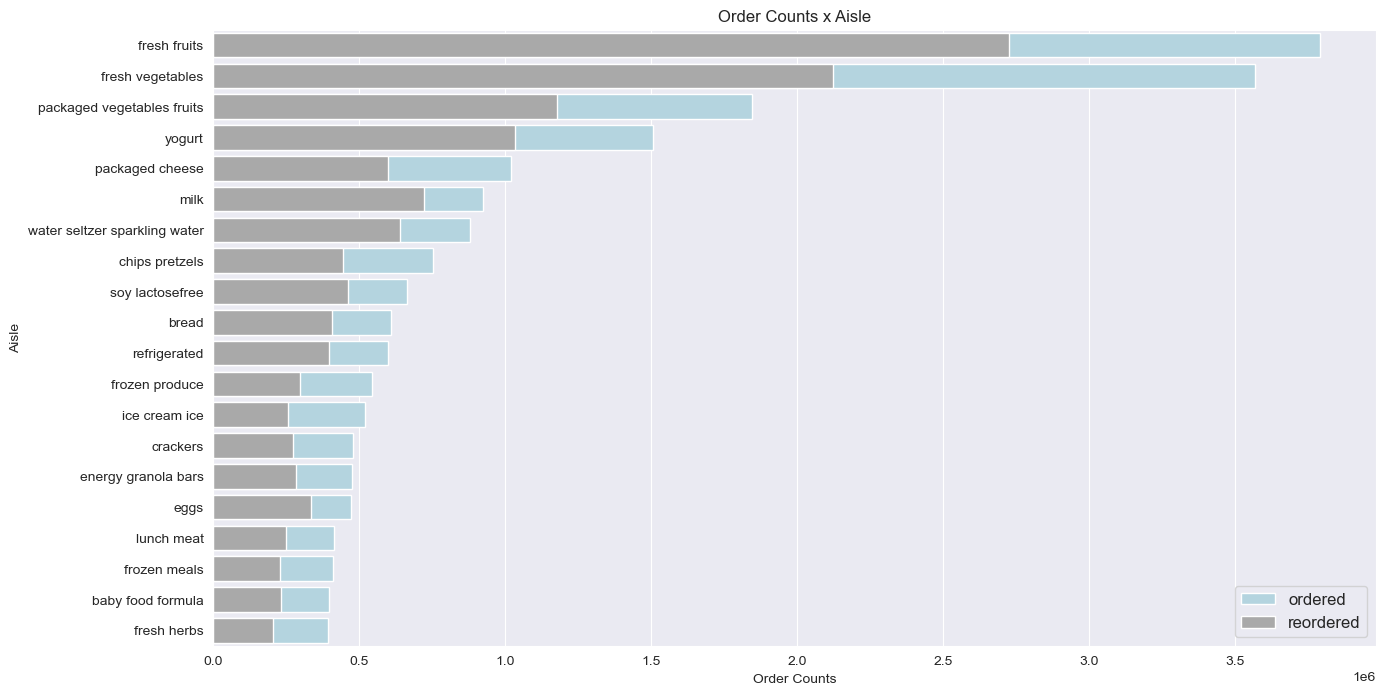

In [19]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.orders[0:20], color='lightblue', label = "ordered")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color='darkgrey', label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Order Counts")
ax.set_title("Order Counts x Aisle")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [20]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

N highest reorder ratios

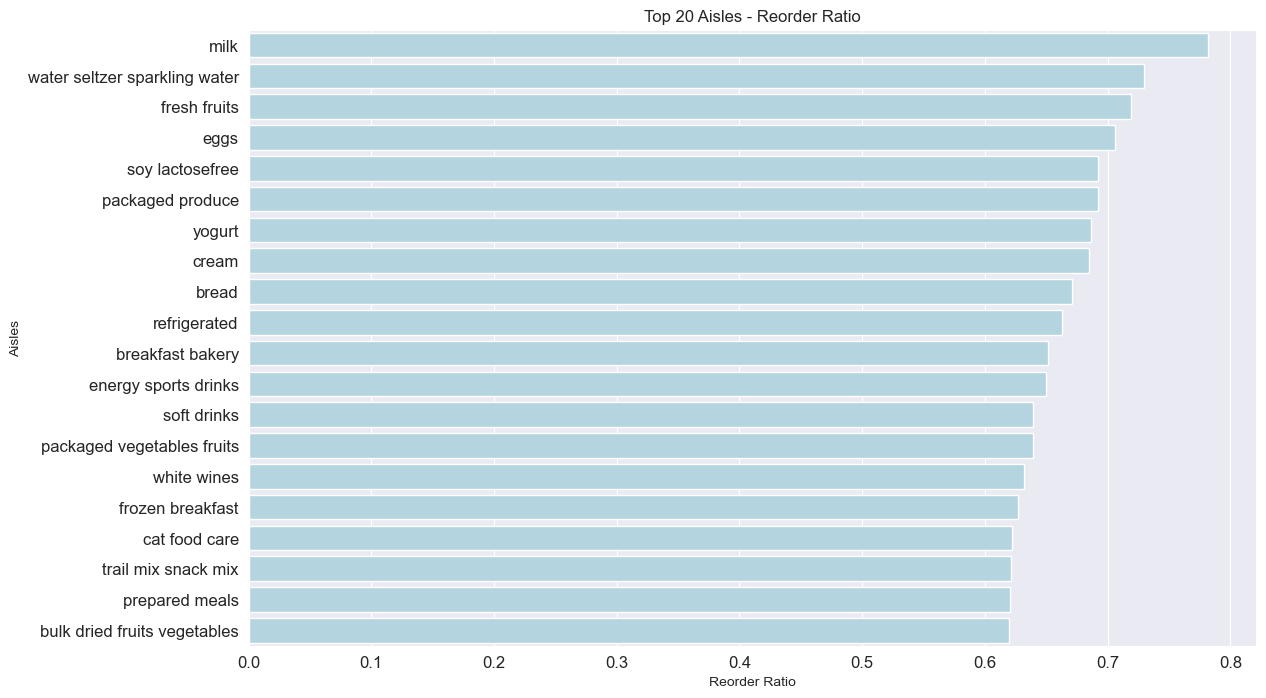

In [21]:
n=20
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:n], x = temp_df.reorder_ratio[0:n], color='lightblue')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title(f"Top {n} Aisles - Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

N lowest reorder ratios

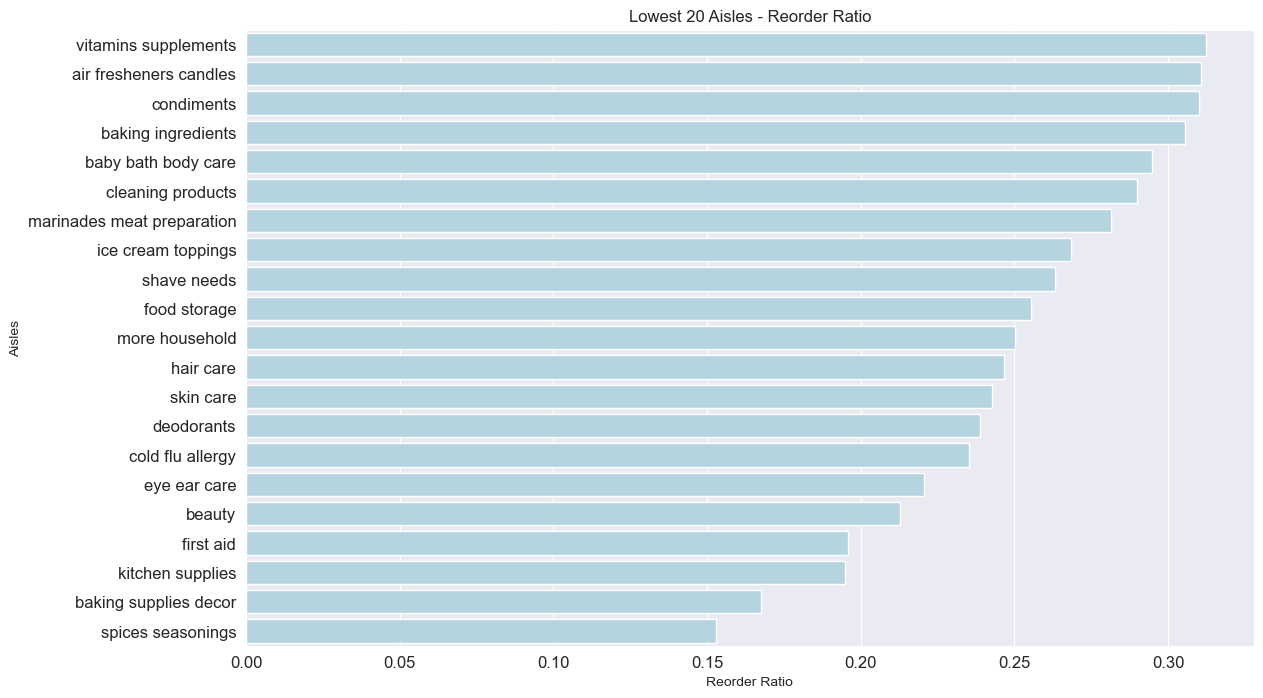

In [22]:
n=20
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[(n+1)*-1:], x = temp_df.reorder_ratio[(n+1)*-1:], color='lightblue')
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title(f"Lowest {n} Aisles - Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Departments

In [23]:
temp_df = order_products.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

Order and reorder frequency by department.

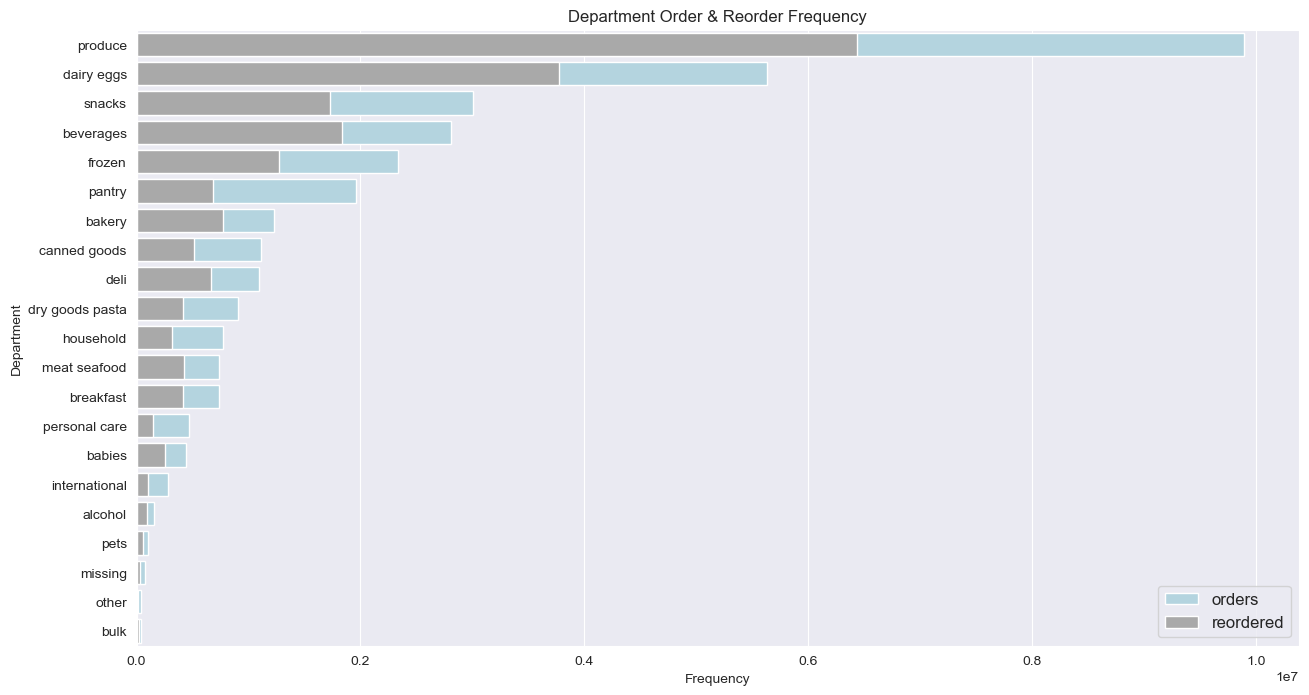

In [25]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["orders"], color='lightblue', label = "orders")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color='darkgrey', label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Department Order & Reorder Frequency")
plt.show()

In [26]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

Re-order ratio by department.

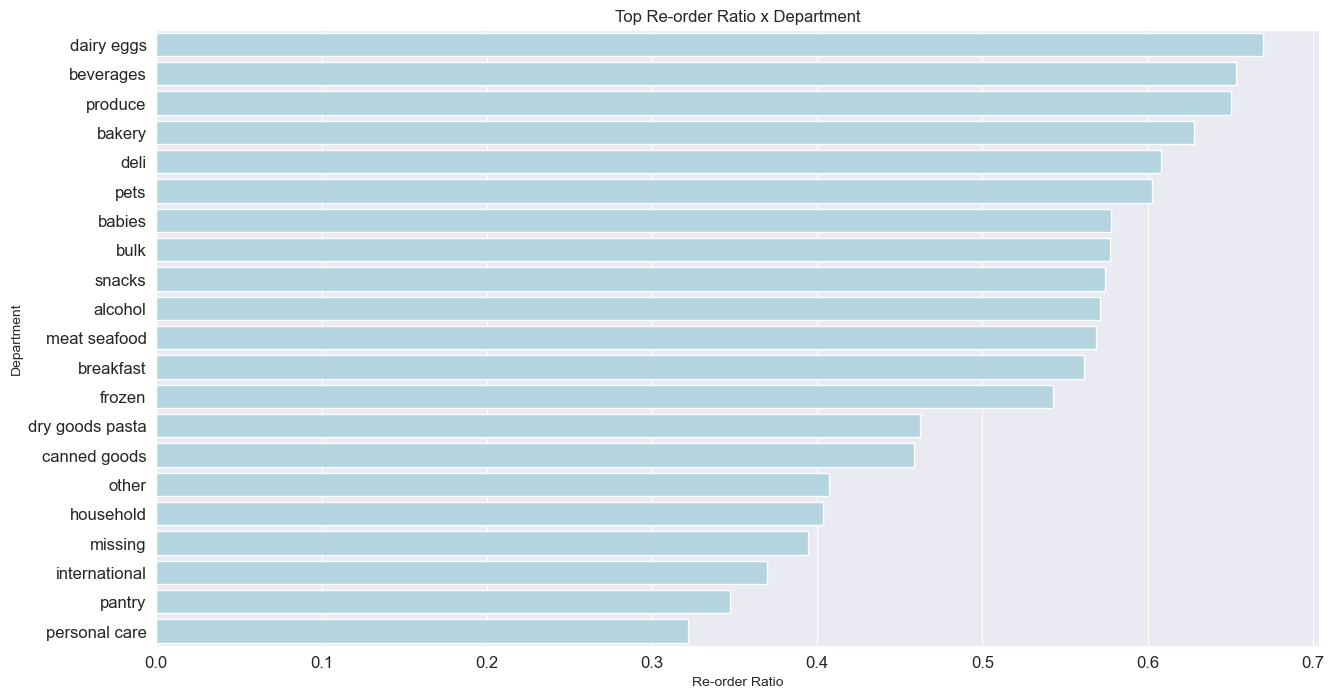

In [28]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color='lightblue')
ax.set_ylabel("Department")
ax.set_xlabel("Re-order Ratio")
ax.set_title("Top Re-order Ratio x Department")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Products

In [30]:
temp_df = order_products.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'orders','sum':'reorders'})
temp_df = temp_df.sort_values('orders', ascending=False).reset_index()

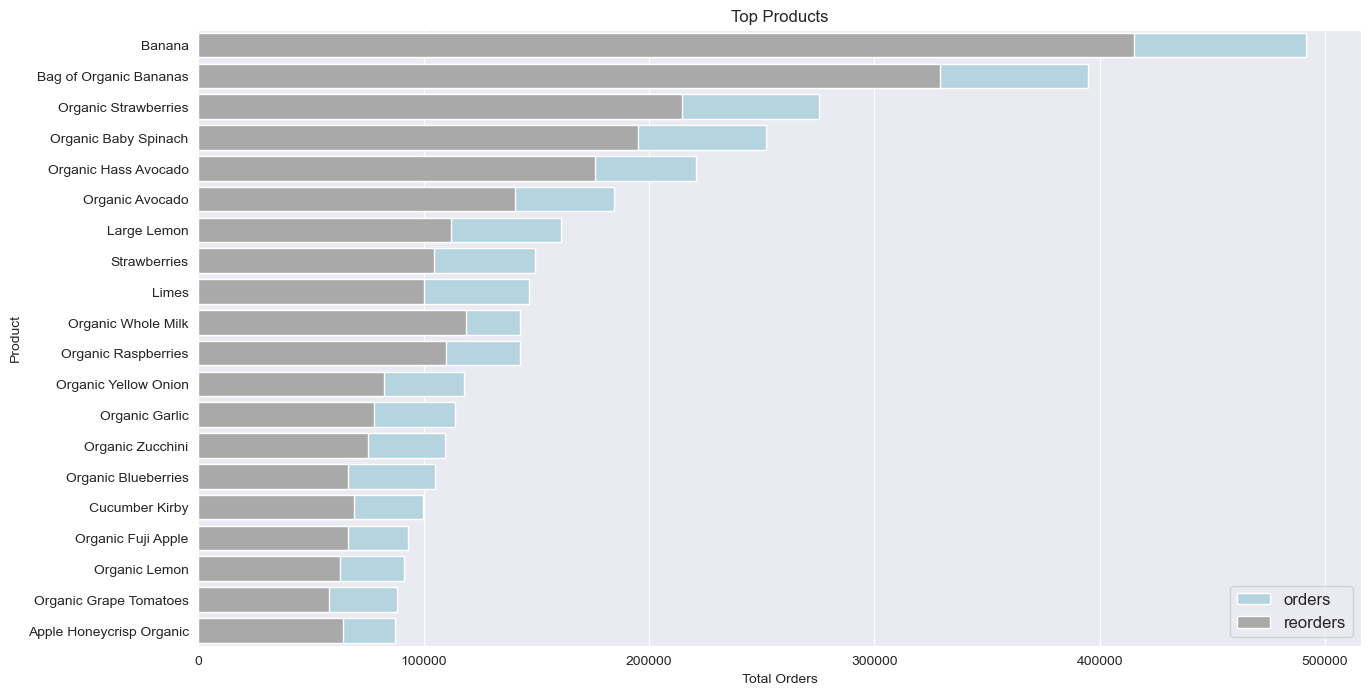

In [31]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.orders[0:20], color='lightblue', label = "orders")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color='darkgrey', label = "reorders")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Top Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [32]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.orders
print(temp_df.sort_values("reorder_ratio", ascending=False).head(10))

                                   product_name  orders  reorders  \
23853                       Raw Veggie Wrappers      69        65   
21388  Serenity Ultimate Extrema Overnight Pads      90        84   
40147                       Orange Energy Shots      13        12   
20296                        Chocolate Love Bar     102        94   
30746                 Soy Powder Infant Formula      35        32   
28078          Simply Sleep Nighttime Sleep Aid      45        41   
35213                 Energy Shot, Grape Flavor      22        20   
32316   Russian River Valley Reserve Pinot Noir      30        27   
23918                        Bars Peanut Butter      69        62   
24218                 Soy Crisps Lightly Salted      67        60   

       reorder_ratio  
23853       0.942029  
21388       0.933333  
40147       0.923077  
20296       0.921569  
30746       0.914286  
28078       0.911111  
35213       0.909091  
32316       0.900000  
23918       0.898551  
24218     

#### Customer breakdown

In [34]:
unique_prod_cust = order_products.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_customers'})
print(unique_prod_cust.sort_values('total_customers', ascending = False).head(10))

                 product_name  total_customers
3677                   Banana            76125
3472   Bag of Organic Bananas            65655
31923    Organic Strawberries            61129
28843    Organic Baby Spinach            56766
22415             Large Lemon            48614
23422                   Limes            46658
42908            Strawberries            44857
30300    Organic Hass Avocado            44704
28807         Organic Avocado            43954
29011     Organic Blueberries            38720


In [35]:
unique_prod_cust = unique_prod_cust.merge(temp_df, on='product_name', how='left')
print(unique_prod_cust.sort_values("reorder_ratio", ascending=False).head(20))

                                   product_name  total_customers  orders  \
37379                       Raw Veggie Wrappers                4      69   
39870  Serenity Ultimate Extrema Overnight Pads                6      90   
28415                       Orange Energy Shots                1      13   
8537                         Chocolate Love Bar                8     102   
41723                 Soy Powder Infant Formula                3      35   
40458          Simply Sleep Nighttime Sleep Aid                4      45   
13844                 Energy Shot, Grape Flavor                2      22   
38793   Russian River Valley Reserve Pinot Noir                3      30   
3832                         Bars Peanut Butter                7      69   
41712                 Soy Crisps Lightly Salted                7      67   
19868                        High Gravity Lager                4      38   
24026                           Maca Buttercups               11     104   
2147        

#### Cumulative Sum of Unique Users Per Product

In [37]:
temp_df = unique_prod_cust.sort_values("total_customers", ascending=False)
temp_df['cum_users'] = temp_df['total_customers'].cumsum()
temp_df = temp_df.reset_index(drop=True)
print(temp_df.head())

             product_name  total_customers  orders  reorders  reorder_ratio  \
0                  Banana            76125  491291    415166       0.845051   
1  Bag of Organic Bananas            65655  394930    329275       0.833755   
2    Organic Strawberries            61129  275577    214448       0.778178   
3    Organic Baby Spinach            56766  251705    194939       0.774474   
4             Large Lemon            48614  160792    112178       0.697659   

   cum_users  
0      76125  
1     141780  
2     202909  
3     259675  
4     308289  


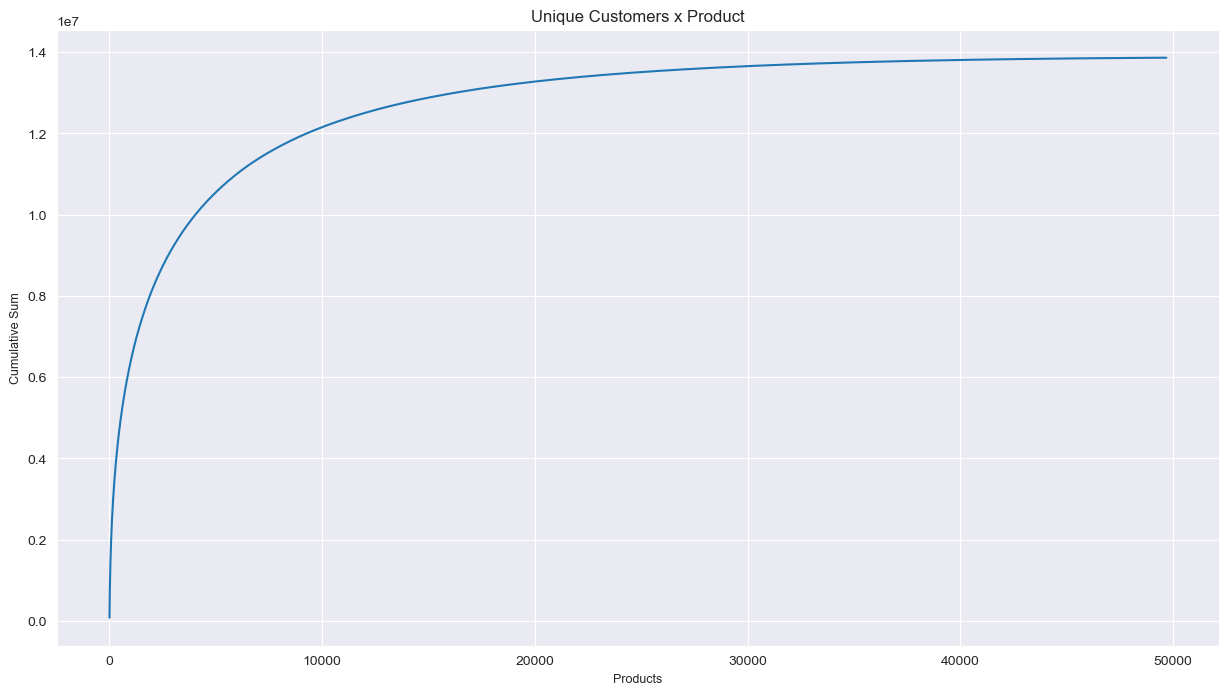

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum", size = 9)
ax.set_title("Unique Customers x Product", size = 12)
plt.show()